**Regularized Logistic Regression**

I
Implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

**Problem Statement**

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.

From these two tests, you would like to determine whether the microchips should be accepted or rejected.
To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [113]:

data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\ex2data2.txt",delimiter = ',')

In [114]:
print(data.shape)

(118, 3)


In [115]:
x_train = data[:, :2]
y_train = data[:, 2]


In [116]:
print(x_train[:5,:])
print(x_train.shape)
print(y_train[:5])
print(y_train.shape)

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
(118, 2)
[1. 1. 1. 1. 1.]
(118,)


In [117]:
print(len(x_train))

118


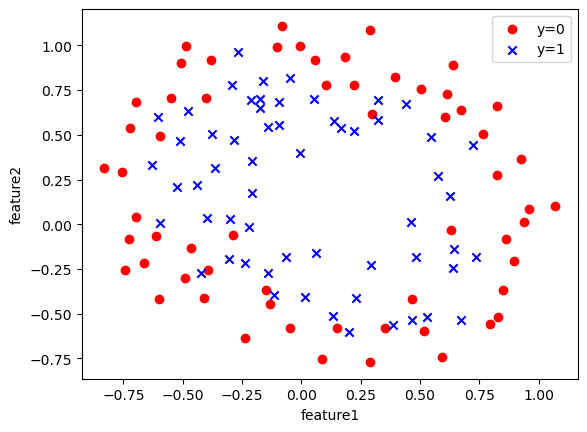

In [118]:
plt.figure()
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],marker = 'o', c = 'r',label = 'y=0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],marker='x',c = 'b',label = 'y=1')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend()
plt.show()

In [119]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [120]:
mapped_x = map_feature(x_train[:,0],x_train[:,1])

In [121]:
print(mapped_x.shape)


(118, 27)


In [122]:
print(x_train[0],mapped_x[0])

[0.051267 0.69956 ] [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [123]:
def sigmoid(z):
    return (1 / (1+ np.exp(-z)))

In [124]:
def compute_cost_reg(x,y,w,b,lambda_):
    m,n = x.shape
    cost = 0
    total_cost = 0
    reg_cost = 0
    #eps = 1e-15

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)
        #f_wb_i = np.clip(f_wb_i, eps, 1 - eps)
        cost = cost - y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)

    cost = cost / m

    for j in range(n):
        reg_cost = reg_cost + w[j]**2

    reg_cost = (lambda_ / (2*m)) * reg_cost

    total_cost = cost + reg_cost

    return total_cost



                     

In [125]:
def compute_gradient_reg(x,y,w,b,lambda_):
    m,n = x.shape

    dj_dw  = np.zeros(w.shape)
    dj_db = 0
    err = 0

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)

        err = (f_wb_i - y[i])

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + lambda_ * w[j] / m

    return dj_dw, dj_db






In [126]:
def gradient_descent_reg(x,y,w_in,b_in,alpha,lambda_,num_iters):

    j_history = []
    w_history = []

    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient_reg(x,y,w_in,b_in,lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 10000:
            cost = compute_cost_reg(x,y,w_in,b_in,lambda_)
            j_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}   ")

    return w_in, b_in, j_history, w_history
        



In [127]:
np.random.seed(1)
initial_w = np.random.rand(mapped_x.shape[1])-0.5
initial_b = 1.

lambda_ = 0.1
alpha = 0.01
iterations = 10000

w,b,j_history,w_history = gradient_descent_reg(mapped_x,y_train,initial_w,initial_b,alpha,lambda_,iterations)


Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.52   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.49   
Iteration 7000: Cost     0.48   
Iteration 8000: Cost     0.47   
Iteration 9000: Cost     0.46   


In [128]:
print(w,b)


[ 0.86966613  1.43584834 -2.50158619 -0.97828748 -1.64670287 -0.08799852
 -0.66998996 -0.43709152 -0.25490311 -1.46399203 -0.1342442  -0.4364137
 -0.49203834 -0.85245513 -0.5910694  -0.07675312 -0.11258834 -0.22162211
 -0.58743624 -0.7857916  -0.8057      0.43979233 -0.46439785  0.18705959
  0.0193164   0.25299682 -1.37855058] 1.3941689266351913


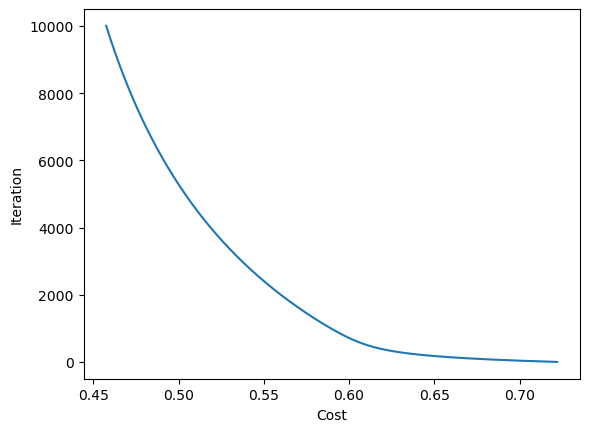

In [129]:
#costs = np.array(j_history)
iterations_idx = np.arange(1, len(j_history) + 1)

plt.figure()
plt.plot(j_history, iterations_idx)
plt.xlabel('Cost')
plt.ylabel('Iteration')
plt.show()

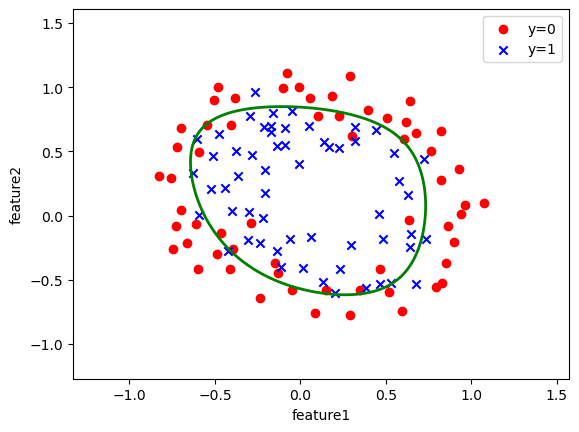

In [140]:
x_min,x_max = x_train[:,0].min()-0.5, x_train[:,0].max()+0.5
y_min,y_max = x_train[:,1].min()-0.5, x_train[:,1].max()+0.5

xx,yy = np.meshgrid(np.linspace(x_min,x_max,300),np.linspace(y_max,y_min,300))
grid_mapped = map_feature(xx.ravel(),yy.ravel())
z = grid_mapped.dot(w) + b
z = z.reshape(xx.shape)

plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],marker='o',c='r',label='y=0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],marker='x',c='b',label='y=1')
plt.contour(xx,yy,z,levels=[0],colors='g',linewidths=2)
plt.xlabel('feature1')
plt.ylabel('feature2')  
plt.legend()
plt.show()




In [141]:
def predict(x,w,b):
    m,n = x.shape
    p=np.zeros(m)

    for i in range(m):
        z_i = np.dot(w,x[i])+b
        f_wb_i = sigmoid(z_i)

        if f_wb_i >= 0.5:
            p[i]=1
        else:
            p[i]=0
    return p

In [143]:
#Accuracy
p = predict(mapped_x,w,b)

print(f"Train Accuracy: {np.mean(p == y_train) * 100:.2f}%")

Train Accuracy: 82.20%
